In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset2.csv', on_bad_lines='skip')
dt.head()

<ipython-input-40-1d8d1412cd33>:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset2.csv', on_bad_lines='skip')


,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,FederalState
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody,1
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN,1
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed,1
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u...",1
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN,1


In [ ]:
dt['EventDate'] = pd.to_datetime(dt['EventDate'])
dt['Month'] = dt['EventDate'].dt.month

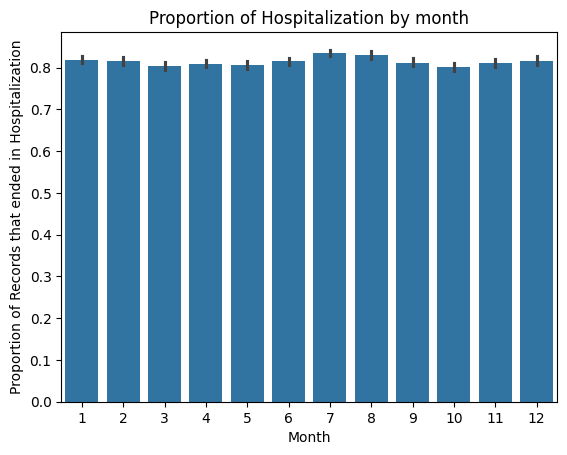

In [ ]:
sns.barplot(x='Month', y='Hospitalized', data=dt)
plt.ylabel('Proportion of Records that ended in Hospitalization')
plt.title('Proportion of Hospitalization by month')
plt.show()

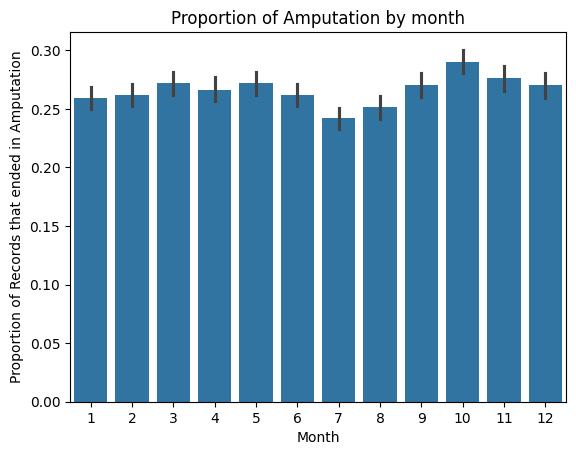

In [ ]:
sns.barplot(x='Month', y='Amputation', data=dt)
plt.ylabel('Proportion of Records that ended in Amputation')
plt.title('Proportion of Amputation by month')
plt.show()

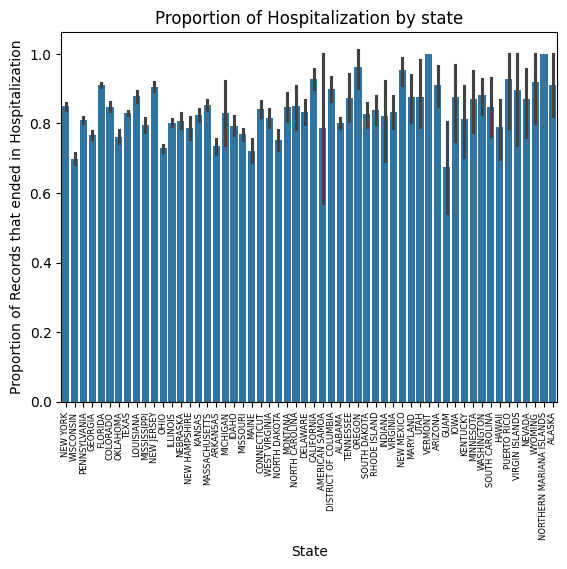

In [ ]:
sns.barplot(x='State', y='Hospitalized', data=dt)
plt.ylabel('Proportion of Records that ended in Hospitalization')
plt.title('Proportion of Hospitalization by state')
plt.xticks(rotation=90, fontsize=6)
plt.show()

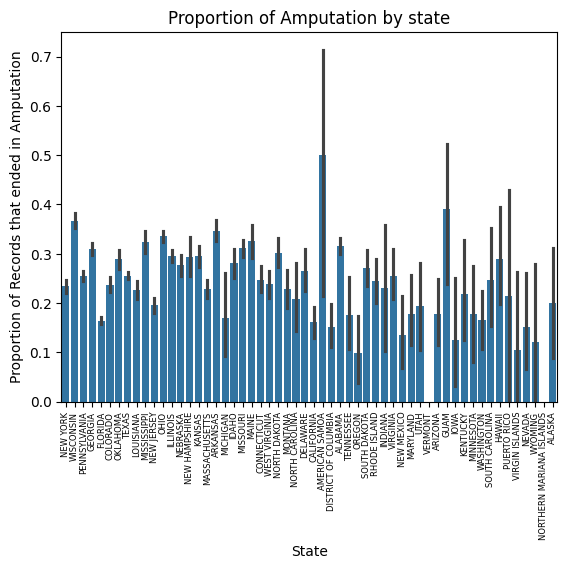

In [ ]:
sns.barplot(x='State', y='Amputation', data=dt)
plt.ylabel('Proportion of Records that ended in Amputation')
plt.title('Proportion of Amputation by state')
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [ ]:
dt.isnull().sum()

,0
ID,0
UPA,0
EventDate,0
Employer,0
Address1,17
Address2,85304
City,16
State,0
Zip,23
Latitude,100


In [ ]:
dt.drop(['Address2', 'Inspection', 'Final Narrative', 'Nature', 'Part of Body', 'Event', 'Source', 'Secondary Source', 'Secondary Source Title', 'Month'], axis=1, inplace=True)
dt.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,FederalState
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,1
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",1
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",1
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,1
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",1


In [ ]:
dt.dropna(inplace=True)
dt.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,FederalState
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,1
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Second degree heat (thermal) burns,"Leg(s), n.e.c.","Ignition of vapors, gases, or liquids","Welding, cutting, and blow torches",1
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,"Traumatic injuries and disorders, unspecified",Nonclassifiable,Other fall to lower level less than 6 feet,"Semi, tractor-trailer, tanker truck",1
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,"Soreness, pain, hurt-nonspecified injury","Leg(s), unspecified",Caught in or compressed by equipment or object...,Pallet jack-powered,1
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,Fractures,"Finger(s), fingernail(s), n.e.c.",Caught in running equipment or machinery durin...,"Metal, woodworking, and special material machi...",1


In [ ]:
dt.replace(',', '', inplace=True, regex=True)
dt.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,FederalState
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,1
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Second degree heat (thermal) burns,Leg(s) n.e.c.,Ignition of vapors gases or liquids,Welding cutting and blow torches,1
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,Traumatic injuries and disorders unspecified,Nonclassifiable,Other fall to lower level less than 6 feet,Semi tractor-trailer tanker truck,1
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,Soreness pain hurt-nonspecified injury,Leg(s) unspecified,Caught in or compressed by equipment or object...,Pallet jack-powered,1
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,Fractures,Finger(s) fingernail(s) n.e.c.,Caught in running equipment or machinery durin...,Metal woodworking and special material machine...,1


In [ ]:
#dt.to_csv('/content/drive/MyDrive/Colab Notebooks/temp.csv', index=False)

In [ ]:
dt.shape

(93451, 18)

In [ ]:
dt[0:2000]

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,FederalState
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,1
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Second degree heat (thermal) burns,Leg(s) n.e.c.,Ignition of vapors gases or liquids,Welding cutting and blow torches,1
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,Traumatic injuries and disorders unspecified,Nonclassifiable,Other fall to lower level less than 6 feet,Semi tractor-trailer tanker truck,1
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,Soreness pain hurt-nonspecified injury,Leg(s) unspecified,Caught in or compressed by equipment or object...,Pallet jack-powered,1
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,Fractures,Finger(s) fingernail(s) n.e.c.,Caught in running equipment or machinery durin...,Metal woodworking and special material machine...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2015030592,969063,2015-03-14,FRITO LAY,100 COMMERCE PARK DRIVE,BRAINTREE,MASSACHUSETTS,2184.0,42.20,-70.99,311919,1.0,0.0,Intracranial injuries unspecified,Brain,Fall on same level unspecified,Floors walkways ground surfaces unspecified,1
1997,2015030593,969426,2015-03-14,Steel Construction Services LLC,3951 E. Loop 820,FORT WORTH,TEXAS,76119.0,32.70,-97.23,332323,0.0,1.0,Soreness pain hurt-nonspecified injury,Finger(s) fingernail(s) n.e.c.,Caught in or compressed by equipment or object...,Trusses girders beams-structurally attached un...,1
1998,2015030594,969196,2015-03-14,BOS SOLUTIONS INC.,Watson B Ranch 32-C Rig #7,BATTLEMENT MESA,COLORADO,81635.0,39.44,-108.03,213112,1.0,1.0,Amputations,Hand(s) n.e.c.,Caught in running equipment or machinery unspe...,Oil drilling rigs and machinery,1
1999,2015030595,969168,2015-03-14,Paragon Tempered Glass,5406 CO. RD. 424,ANTWERP,OHIO,45813.0,41.19,-84.73,327215,1.0,0.0,Internal injuries to organs and blood vessels ...,Testis (testes),Climbing or stepping up or down-single episode,Bodily motion or position of injured ill worker,1


In [ ]:
#dt[0:2000].to_csv('/content/drive/MyDrive/Colab Notebooks/smallerDataset2.csv', index=False)

In [ ]:
display(dt['Hospitalized'].value_counts())
display(dt['Amputation'].value_counts())

,count
Hospitalized,
1.0,74995
0.0,17880
2.0,558
3.0,11
4.0,3
6.0,2
5.0,2


,count
Amputation,
0.0,68651
1.0,24783
2.0,17


In [ ]:
dt['Hospitalized'] = dt[dt['Hospitalized'] < 2]['Hospitalized']
dt['Amputation'] = dt[dt['Amputation'] < 2]['Amputation']

In [ ]:
display(dt['Hospitalized'].value_counts())
display(dt['Amputation'].value_counts())

,count
Hospitalized,
1.0,74995
0.0,17880


,count
Amputation,
0.0,68651
1.0,24783


In [ ]:
#dt[0:2000].to_csv('/content/drive/MyDrive/Colab Notebooks/smallerDataset2.csv', index=False)

In [ ]:
#dt[0:10000].to_csv('/content/drive/MyDrive/Colab Notebooks/largerDataset2.csv', index=False)

In [ ]:
#dt[10000:20000].to_csv('/content/drive/MyDrive/Colab Notebooks/testingLargerDataset2.csv', index=False)

In [ ]:
dt.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,NatureTitle,Part of Body Title,EventTitle,SourceTitle,FederalState
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Fractures,Lower leg(s),Injured by physical contact with person while ...,Co-worker,1
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Second degree heat (thermal) burns,Leg(s) n.e.c.,Ignition of vapors gases or liquids,Welding cutting and blow torches,1
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,Traumatic injuries and disorders unspecified,Nonclassifiable,Other fall to lower level less than 6 feet,Semi tractor-trailer tanker truck,1
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,Soreness pain hurt-nonspecified injury,Leg(s) unspecified,Caught in or compressed by equipment or object...,Pallet jack-powered,1
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,Fractures,Finger(s) fingernail(s) n.e.c.,Caught in running equipment or machinery durin...,Metal woodworking and special material machine...,1


In [ ]:
dt['Primary NAICS'].value_counts()

,count
Primary NAICS,
622110,1399
445110,1216
238210,1147
236220,1090
213112,1024
...,...
325413,1
11121,1
551111,1


In [ ]:
primaryNAICSDt = pd.DataFrame(dt['Primary NAICS'].value_counts().reset_index())
primaryNAICSDt = primaryNAICSDt.head(10)
display(primaryNAICSDt)

,Primary NAICS,count
0,622110,1399
1,445110,1216
2,238210,1147
3,236220,1090
4,213112,1024
5,493110,986
6,237310,905
7,238160,901
8,238220,833
9,491110,830


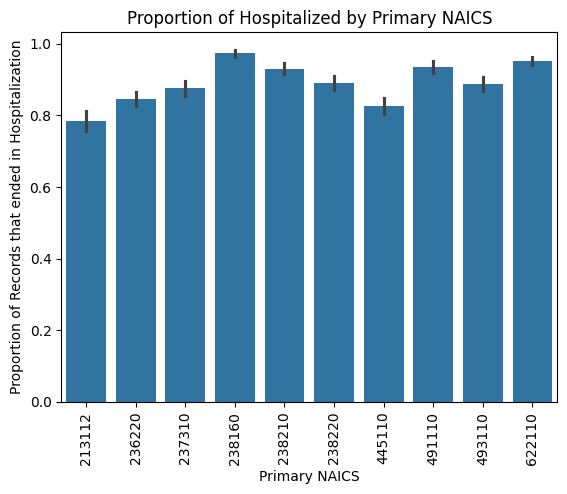

In [ ]:
sns.barplot(x='Primary NAICS', y='Hospitalized', data=dt[dt['Primary NAICS'].isin(primaryNAICSDt['Primary NAICS'])])
plt.ylabel('Proportion of Records that ended in Hospitalization')
plt.title('Proportion of Hospitalized by Primary NAICS')
plt.xticks(rotation=90, fontsize=10)
plt.show()

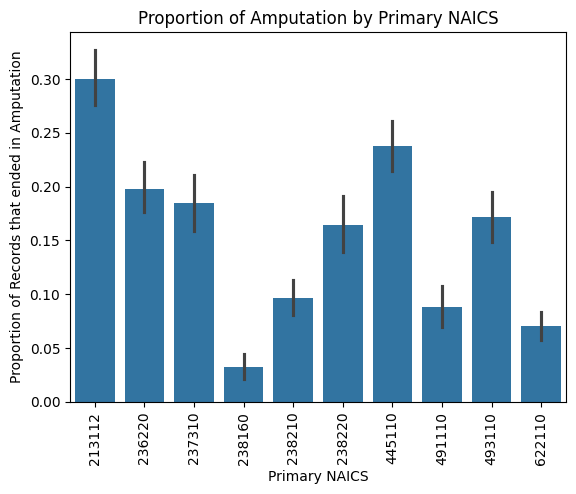

In [ ]:
sns.barplot(x='Primary NAICS', y='Amputation', data=dt[dt['Primary NAICS'].isin(primaryNAICSDt['Primary NAICS'])])
plt.ylabel('Proportion of Records that ended in Amputation')
plt.title('Proportion of Amputation by Primary NAICS')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:
dt['Employer'].value_counts()

,count
Employer,
U.S. Postal Service,480
United States Postal Service,253
UPS,219
U.S. POSTAL SERVICE,142
Walmart,120
...,...
DYNAMIC INDUSTRIES INC.,1
BROCHSTEINS INC.,1
Clarion Boards Inc.,1


In [ ]:
employerDt = pd.DataFrame(dt['Employer'].value_counts().reset_index())
employerDt = employerDt.head(10)
display(employerDt)

,Employer,count
0,U.S. Postal Service,480
1,United States Postal Service,253
2,UPS,219
3,U.S. POSTAL SERVICE,142
4,Walmart,120
5,United Parcel Service,112
6,USPS,103
7,United Parcel Service Inc.,96
8,Tyson Foods Inc.,85
9,US Postal Service,84


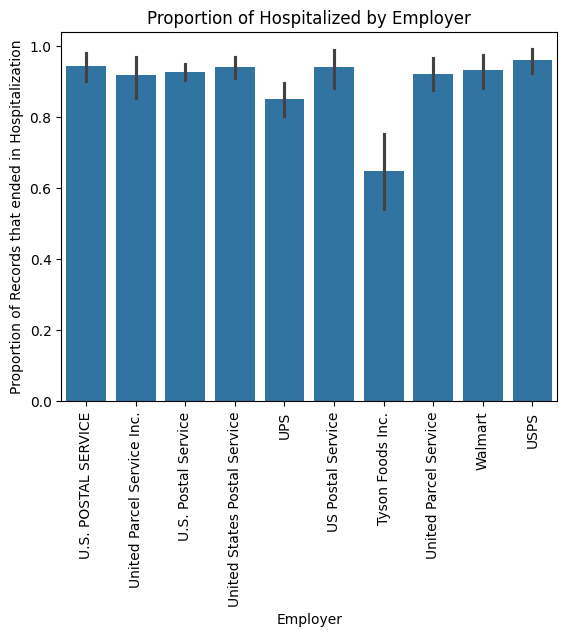

In [ ]:
sns.barplot(x='Employer', y='Hospitalized', data=dt[dt['Employer'].isin(employerDt['Employer'])])
plt.ylabel('Proportion of Records that ended in Hospitalization')
plt.title('Proportion of Hospitalized by Employer')
plt.xticks(rotation=90, fontsize=10)
plt.show()

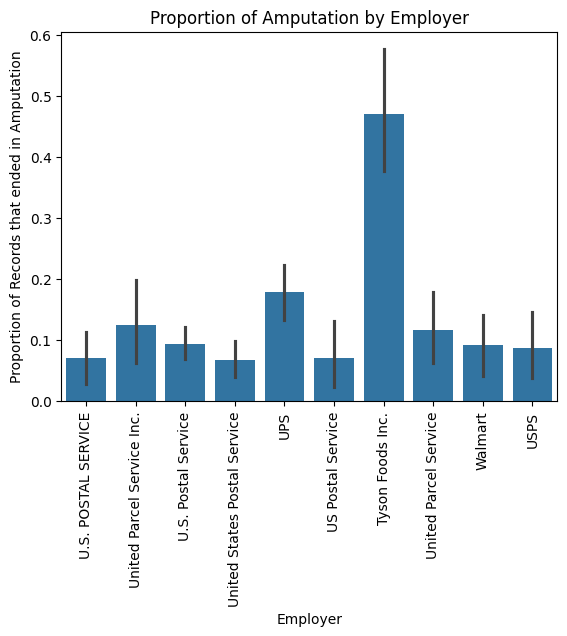

In [ ]:
sns.barplot(x='Employer', y='Amputation', data=dt[dt['Employer'].isin(employerDt['Employer'])])
plt.ylabel('Proportion of Records that ended in Amputation')
plt.title('Proportion of Amputation by Employer')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:
display(dt['Hospitalized'].value_counts())
display(dt['Amputation'].value_counts())

,count
Hospitalized,
1.0,74995
0.0,17880


,count
Amputation,
0.0,68651
1.0,24783


In [ ]:
hospitalizedCountDt = pd.DataFrame(dt['Hospitalized'].value_counts().reset_index())
numberOfHospitalized = hospitalizedCountDt[hospitalizedCountDt['Hospitalized'] == 1]['count'].iloc[0]
amputationCountDt = pd.DataFrame(dt['Amputation'].value_counts().reset_index())
numberOfAmputation = amputationCountDt[amputationCountDt['Amputation'] == 1]['count'].iloc[0]
print('Percent of data that ends in hospitalization: ' + str(100 * numberOfHospitalized / (dt.shape[0])) + '%')
print('Percent of data that ends in amputation: ' + str(100 * numberOfAmputation / (dt.shape[0])) + '%')

Percent of data that ends in hospitalization: 80.2506126205177%
Percent of data that ends in amputation: 26.519780419685183%
